---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로써 서울시 공유자전거인<font color="red"> '따릉이'의 수요와 날씨간 연관성을 분석</font>하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

---

## ▣ 데이터 소개
[기본 데이터]
* 학습데이터 : traindata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [과제1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [409]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [410]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
data = pd.read_csv("traindata.csv")

In [411]:
data.dtypes

date              object
hour               int64
PM10             float64
PM2.5            float64
ozone            float64
temperature      float64
precipitation      int64
windspeed        float64
humidity           int64
visibility         int64
count              int64
dtype: object

In [412]:
data['date']=pd.to_datetime(data['date'])

In [413]:
data.head(24)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
5,2021-04-01,6,31.0,14.0,0.009,12.6,0,3.0,45,2000,77
6,2021-04-01,7,30.0,10.0,0.018,12.0,0,3.5,46,2000,171
7,2021-04-01,8,39.0,10.0,0.027,14.0,0,3.5,43,2000,330
8,2021-04-01,9,35.0,10.0,0.032,16.2,0,4.3,38,2000,218
9,2021-04-01,10,31.0,9.0,0.033,18.2,0,3.7,31,2000,175


### [과제2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 변수를 포함하여, 최소 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1 : 1시간전 강우 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 1시간전 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 : 하루 기준 시정이 높을수록 따릉이 대여량이 높을것이다.
    - 대립 가설: 시정과 따릉이 대여량은 연관성이 없다.
    
- 가설 3 : 현재시간을 기준으로 전후로 3시간 동안 비가 온적이 있다면 따릉이 대여량이 낮을 것이다.
    - 대립 가설: 전후 3시간동안 비가 왔다는 사실과 따릉이 대여량에는 관계가 없다.

- 가설 4 : 하루 평균 기온이 26도보다 높거나 15도보다 낮을 경우 따릉이 대여량이 낮아질 것이다.
    - 대립 가설: 온도와 따릉이 대여량은 관계가 없다.

- 가설 5 : 사람이 불쾌지수를 느끼는 조건 0.81 * 섭씨온도 +0.01 * 상대습도(%)（0.99*섭씨온도 - 14.3）+ 46.3 의 수식이 75이상이라면 따릉이 대여량이 낮아질 것이다.
    - 대립 가설: 온도 및 습도와 대여량 사이에 관계가 없다.

- 가설 6 : 낮동안의(오전 10시 - 오후 5시) 미세먼지 수치가 76이상, 초미세먼지 수치가 38이상일 때 (상당히 나쁨 기준) 따릉이 수요량이 낮아질 것이다.
    - 대립 가설: 미세먼지 수치 및 초미세먼지 수치는 대여량과 관계가 없다.

### [과제3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?
    - 시간을 의미함. 
    - 하루가 0~23까지로 구성되어 있는 것을 봤을 때
    - 0: 0시-0시 59분
    - 1: 1시-1시 59분
    - 2: 2시-2시 59분
    - 등등
    

2. 변수가 수치형인지 범주형인지


In [414]:
#변수의 자료형을 확인해보세요.
data['hour'].unique()
# 범주형이다.

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int64)

3. 변수의 결측치 존재 여부 및 조치방안

In [415]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['hour'].isna().sum()

0

4. 변수의 기초 통계량 확인

In [416]:
#변수의 기초 통계량을 확인해보세요
hour = data['hour']
hour.value_counts()
#5827개 row

0     243
21    243
19    243
15    243
11    243
7     243
22    243
18    243
14    243
10    243
23    243
17    243
13    243
9     243
5     243
1     243
20    243
16    243
12    243
8     243
6     242
3     242
2     242
4     241
Name: hour, dtype: int64

5. 변수의 분포 확인

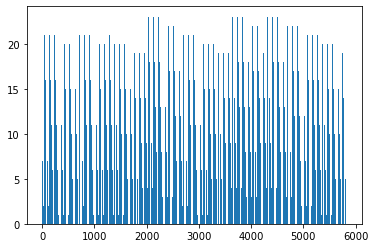

In [417]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
plt.bar(hour.index, hour.values)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='count'>

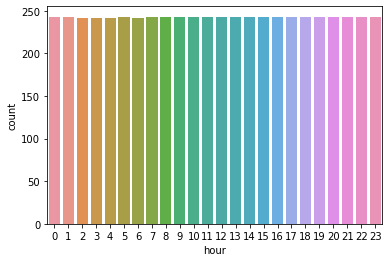

In [418]:
sns.countplot(data['hour'])

6. 위 정보로 부터 파악한 내용 정리

In [419]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [420]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.
    - 해당 날짜 해당 시간의 온도

2. 변수가 수치형인지 범주형인지


In [421]:
#변수의 자료형을 확인해보세요.
tmp = data['temperature']
tmp.unique() 
# 수치형

array([13.1, 12.4, 13. , 12.6, 12. , 14. , 16.2, 18.2, 20.2, 21.7, 22.6,
       23.6, 23.2, 23.5, 23. , 22.3, 20.6, 19.2, 18.1, 16.5, 15.4, 14.6,
       14.2, 13.7, 12.9, 12.8, 12.7, 13.6, 17.4, 18.9, 20.7, 21.6, 22. ,
       22.9, 21. , 19.9, 19.4, 19. , 18.8, 18.4, 18. , 17.7, 17.6, 17.3,
       17.5, 16.8, 15.8, 14.9, 14.8, 14.5, 14.4, 14.3, 13.5, 12.5, 11.7,
       11.4, 10.9, 10.5, 10.3, 10.4, 10.2,  9.7,  9.5,  9.6, 10. , 10.7,
       11.6, 14.7, 15.5, 15. , 12.3,  9. ,  8.1,  7.4,  6.8,  6.5,  6.1,
        5.5,  5.4,  7.9, 16.6, 17.9, 15.9, 13.3, 10.6, 10.8,  9.4, 16.1,
       17. , 18.6, 16. , 15.1, 12.1,  8.7,  8.2,  8.3, 16.7, 19.3, 20.4,
       19.7, 13.8, 11.3, 10.1,  8.9,  7.6,  7.2, 13.9, 17.8, 11.2,  8.6,
        7.8,  7.7,  8.8, 17.2, 19.5, 18.5,  9.8,  9.1,  8. , 15.2, 18.3,
       11.8,  8.4, 12.2, 17.1, 20.8, 21.2, 21.5, 16.9, 11. , 11.1, 11.9,
       11.5,  5.7,  5. ,  4.6,  3.9,  3.4,  3.1,  7.1,  6.6,  6.4,  6.7,
        6.9,  7. ,  7.3,  6.2, 13.2,  5.8,  5.6,  8

3. 변수의 결측치 존재 여부 및 조치방안

In [422]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
tmp.isna().sum()

0

4. 변수의 기초 통계량 확인

In [423]:
#변수의 기초 통계량을 확인해보세요
tmp.describe()
# 5827개 row, 평균온도 19도, 최저온도 -3.5, 최고온도 36.3, 
# 사분위수 14.1, 20.4, 24.9

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

5. 변수의 분포 확인

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


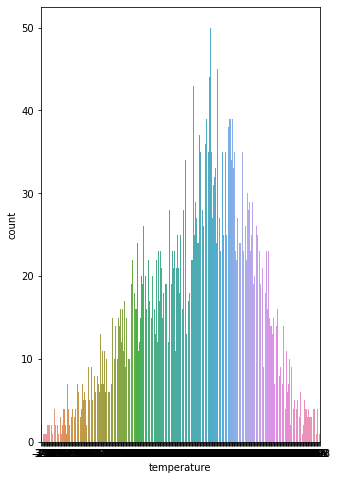

In [424]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
plt.figure(figsize=(5, 8))
sns.countplot(tmp)
plt.show()

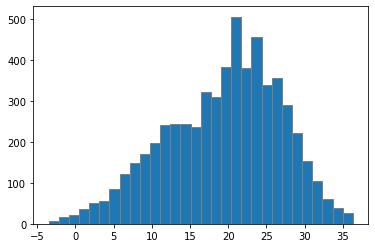

In [425]:
plt.hist(tmp, bins = 30, edgecolor = 'gray')
plt.show()

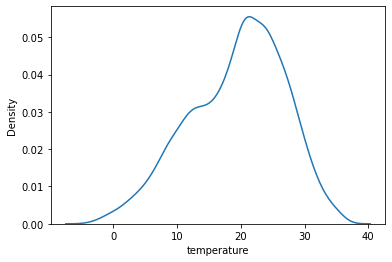

In [426]:
sns.kdeplot(tmp) 
plt.show()
# 20-30도 사이 온도가 가장 많다.

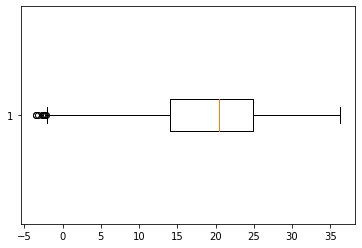

In [427]:
plt.boxplot(tmp, vert=False)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [428]:
#위 정보로부터 파악하신 내용을 정리해보세요.


- 1. 주로 20-25도 사이에 몰려있다.
- 2. 영하 5도에서 3도는 이상치로 인식될 정도로 양이 작다.


7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 1. 주로 몰려있는 온도인 20-25도에 어떤 달이 많을까?

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.
    - 강우 여부로, 비가 왔으면 1, 비가 오지 않았으면 0을 나타내는 boolean변수일 것이다.

2. 변수가 수치형인지 범주형인지


In [38]:
#변수의 자료형을 확인해보세요.
prec = data['precipitation']
prec.unique()
# 범주형이구낭

array([0, 1], dtype=int64)

3. 변수의 결측치 존재 여부 및 조치방안

In [39]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
prec.isna().sum()

0

4. 변수의 기초 통계량 확인

In [48]:
#변수의 기초 통계량을 확인해보세요
print(prec.value_counts())
#0인날이 5387로 더 많다.
print(prec.value_counts()/prec.shape[0])

0    5387
1     440
Name: precipitation, dtype: int64
0    0.924489
1    0.075511
Name: precipitation, dtype: float64


In [50]:
prec.shape

(5827,)

5. 변수의 분포 확인

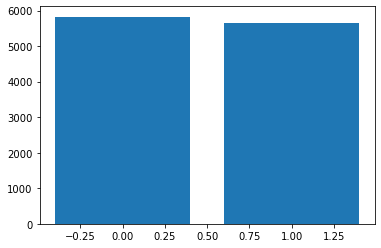

In [76]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
plt.bar(prec.values, prec.index)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


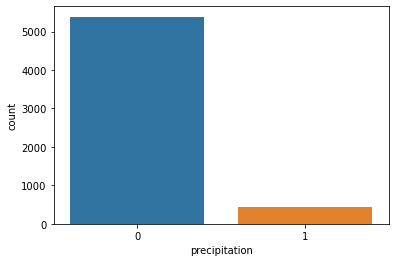

In [74]:
sns.countplot(prec)
plt.show()

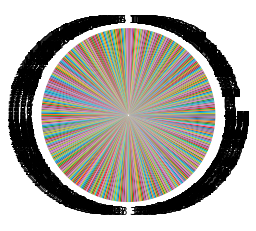

In [75]:
plt.pie(prec.values, labels = prec.index)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 1. 5827개 행 중 비가 온 시간보다 비가 안 온 시간이 더 많다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 1. 비가 온 날은 습도도 높을까?
- 2. 비가 온 다음날도 습도가 높을까?
- 3. 비가 온 날과 그 다음날은 시정이 짧을까?
- 4. 비가 온 것이 오존수치에 영향을 미칠까?
- 5. 비가 오고나서는 미세먼지 수치가 낮아질까?

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.
    - 그 시간 동안의 평균 풍속

2. 변수가 수치형인지 범주형인지


In [77]:
#변수의 자료형을 확인해보세요.
wind = data['windspeed']
wind.unique()
#수치형이다.

array([1.4, 2.1, 3.4, 3.1, 2.9, 3. , 3.5, 4.3, 3.7, 3.2, 3.6, 2.4, 4.6,
       6.5, 5.7, 5.1, 4.8, 5. , 4. , 4.1, 4.9, 3.9, 2.8, 1.6, 0.9, 1.9,
       1.8, 2.3, 0.8, 2.5, 2.6, 2.2, 3.3, 5.4, 4.4, 4.5, 3.8, 1.7, 2.7,
       4.2, 2. , 1.5, 0.7, 0.4, 1. , 0.5, 1.2, 1.1, 1.3, 4.7, 0.6, 0.2,
       5.2, 6.1, 5.3, 6.7, 0. , 0.3, 5.5, 5.9, 6. , 8.3, 5.6, 6.6, 0.1,
       8.1, 6.9, 6.3, 5.8, 6.8, 6.4, 6.2])

3. 변수의 결측치 존재 여부 및 조치방안

In [78]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
wind.isna().sum()

0

4. 변수의 기초 통계량 확인

In [85]:
#변수의 기초 통계량을 확인해보세요
wind.describe()
#5827개 행,
# 평균 풍속 2.2
# 최저 풍속 0, 최고 풍속 8.3
# 사분위수 0, 1.5, 2.2, 2.8, 8.3
# => 1.5~2.8 사이에 몰려있되, 아예 바람이 강한 날도 있다.

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

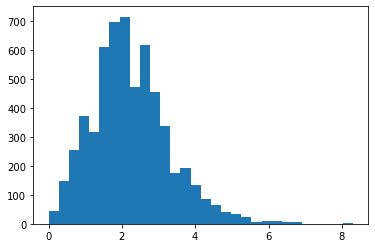

In [82]:
plt.hist(wind, bins=30)
plt.show()

#풍속이 1.5~3사이에 많은 것 같다.

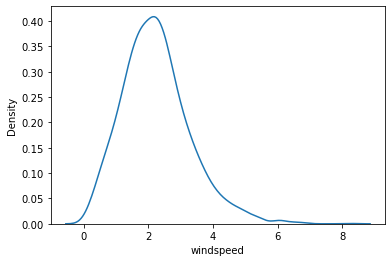

In [89]:
sns.kdeplot(wind)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 1. 풍속이 1.5~2.8 사이에 몰려있고, 최대는 8.3인것을 봤을 때 평균 풍속은 2.2이고 대부분의 데이터가 그 근방에 몰려있지만, 간혹 바람이 세게 부는날이 며칠 있었을 것이다.


7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 1. 바람이 많이 부는 날은 언제일까? 바람이 제3사분위수보다 높은 날들이 많이 모여있는 달을 파악해보고 싶다.
- 2. 풍속이 제 3사분위수인 28보다 높은날은 비가 온 날? 아니면 그 전날에 비가옴? 아니면 하루 후에 비가왔는지?

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.
    - 그 시간의 습도

2. 변수가 수치형인지 범주형인지


In [93]:
#변수의 자료형을 확인해보세요.
humidity = data['humidity']
humidity.unique() #숫자형

array([ 49,  53,  43,  44,  45,  46,  38,  31,  25,  21,  20,  19,  22,
        24,  27,  33,  40,  41,  39,  42,  34,  29,  26,  30,  35,  36,
        51,  54,  57,  59,  60,  62,  79,  89,  94,  96,  98,  97,  95,
        92,  91,  93,  86,  80,  75,  67,  61,  50,  52,  55,  69,  71,
        72,  78,  66,  28,  23,  37,  48,  58,  64,  63,  32,  56,  70,
        77,  47,  68,  99,  76,  65,  74,  83,  85,  87,  81,  84,  73,
        88,  82,  90, 100], dtype=int64)

3. 변수의 결측치 존재 여부 및 조치방안

In [94]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
humidity.isna().sum()

0

4. 변수의 기초 통계량 확인

In [96]:
#변수의 기초 통계량을 확인해보세요
humidity.describe()
#5827개 row, 
# 평균 습도 68, 최저습도19, 최고습도100

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

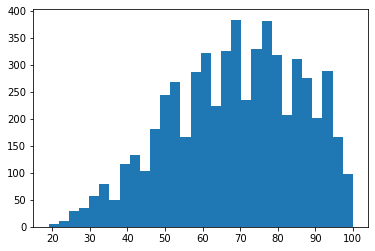

In [99]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
plt.hist(humidity, bins=30)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


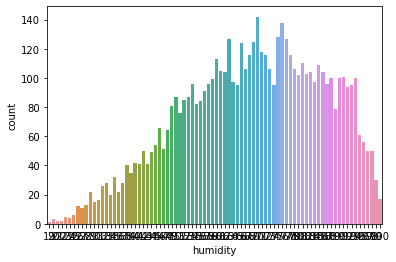

In [98]:
sns.countplot(humidity)
plt.show()

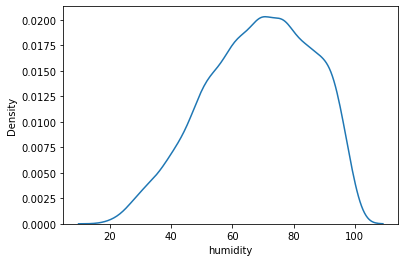

In [100]:
sns.kdeplot(humidity)
plt.show()

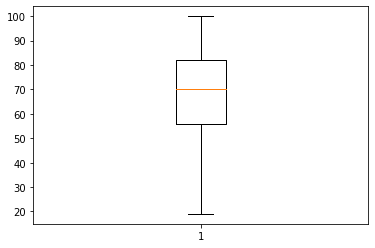

In [102]:
plt.boxplot(humidity)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 1. 습도가 55~80에 많이 몰려있다.
- 2. 여름 데이터가 많이 있을 것 같다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 1. 데이터들 중에 날짜가 여름인 날(6월-9월)이 다른 계절보다 많은지 확인하고싶다.
- 2. 습도가 높은 날(75이상)에는 그 전날/당일/다음날에 비가 왔을 것 같다. => 전후 3일간의 강우여부
- 3. 습도가 높은날 오존수치가 높을 것 같음.
- 4. 습도가 높은 날에는 따릉이 대여를 많이 안할 것 같다.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.
    - 시정 : 특정 기상상태에 따른 가시성으로, 높을수록 산같이 높은 곳에 올라갔을 때 멀리 내다보임

2. 변수가 수치형인지 범주형인지


In [103]:
#변수의 자료형을 확인해보세요.
visibility = data['visibility']

In [104]:
visibility.unique() #수치형

array([2000,  521,  206, ..., 1193, 1233, 1250], dtype=int64)

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [105]:
visibility.isna().sum()

0

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [107]:
visibility.describe()
# 5827개 row, 평균 1758, 최저 60, 최고 2000
# 60, 1935, 2000, 2000

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

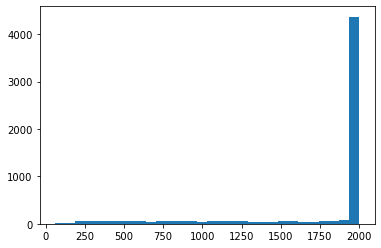

In [109]:
plt.hist(visibility, bins=30)
plt.show()

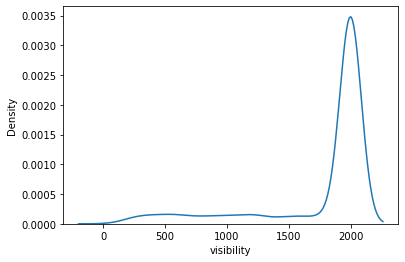

In [110]:
sns.kdeplot(visibility)
plt.show()

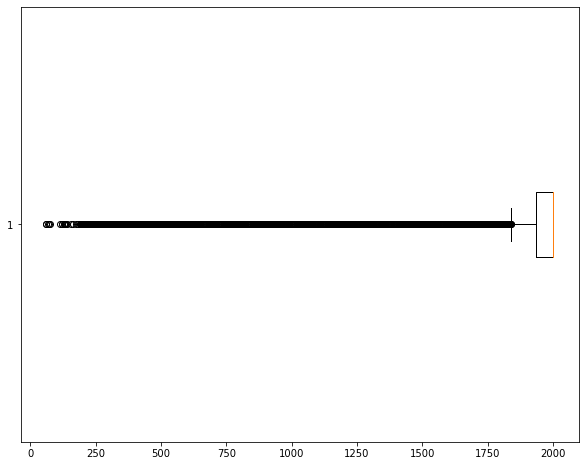

In [114]:
plt.figure(figsize=(10, 8))
plt.boxplot(visibility, vert=False)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 1. 데이터가 보통 2000근방에 많이 모여있다. 하지만 최저값이 60, 최고값이 2000인 것을 봤을 때 시정값이 2000에 가까운 날이 많지만 가끔 2000아래로 떨어지는 날도 며칠 있을 것이다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 1. 2000아래로 떨어진 날의 오존수치, 미세먼지 수치, 강우여부
- 2. 시정값에 영향을 주는 요인에 오존, 미세먼지, 강우여부, 습도, 초미세먼지 수치 등이 있을 것 같다.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.
    - 그 시간의 오존농도

2. 변수가 수치형인지 범주형인지


In [115]:
#변수의 자료형을 확인해보세요.
ozone=data['ozone']
ozone.unique() #수치형

array([0.002, 0.003, 0.023, 0.028, 0.008, 0.009, 0.018, 0.027, 0.032,
       0.033, 0.038, 0.042, 0.044, 0.045, 0.043, 0.039, 0.037, 0.036,
       0.034, 0.04 , 0.035, 0.041, 0.025, 0.01 , 0.015, 0.006, 0.022,
       0.019, 0.03 , 0.026, 0.021, 0.017, 0.031, 0.029, 0.024, 0.02 ,
       0.016, 0.004, 0.049, 0.053, 0.055, 0.059, 0.06 , 0.051, 0.046,
       0.012, 0.013, 0.014, 0.047, 0.05 , 0.058, 0.052, 0.007, 0.056,
         nan, 0.066, 0.057, 0.011, 0.054, 0.065, 0.067, 0.07 , 0.077,
       0.072, 0.005, 0.064, 0.068, 0.071, 0.061, 0.074, 0.069, 0.048,
       0.063, 0.079, 0.106, 0.104, 0.085, 0.075, 0.081, 0.073, 0.08 ,
       0.062, 0.078, 0.088, 0.107, 0.11 , 0.116, 0.087, 0.082, 0.097,
       0.099, 0.094, 0.086, 0.083, 0.09 , 0.093, 0.084, 0.076, 0.089,
       0.1  , 0.137, 0.115, 0.092, 0.098, 0.103, 0.096, 0.111, 0.118,
       0.101, 0.001])

3. 변수의 결측치 존재 여부 및 조치방안

In [117]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
ozone.isna().sum()
#결측치 128개 => 앞의 숫자로 채울까 ? 왜냐면 1번째 데이터는 비지 않았기 때문에

0    0.002
1    0.003
2    0.023
3    0.028
4    0.008
Name: ozone, dtype: float64

In [119]:
ozone.fillna(method='ffill', inplace=True)
ozone.isna().sum()

0

4. 변수의 기초 통계량 확인

In [121]:
#변수의 기초 통계량을 확인해보세요
ozone.describe()
#5827컬럼, 평균오존농도 0.032, 
# 0.001, 0.019, 0.030, 0.041, 0.137

count    5827.000000
mean        0.031589
std         0.018303
min         0.001000
25%         0.019000
50%         0.030000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

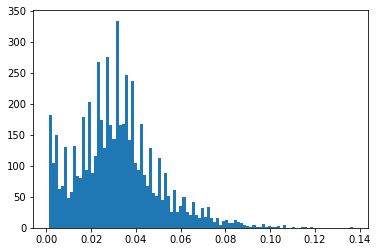

In [126]:
plt.hist(ozone, bins=100)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


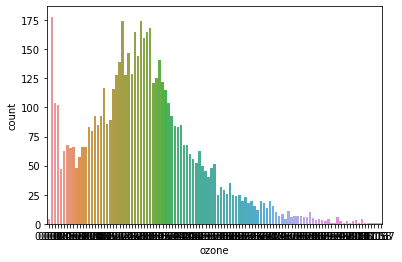

In [125]:
sns.countplot(ozone)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 1. 0.0부근, 0.03부근에 많이 몰려있다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 1. 아까전에 시정 그래프에서 시정범위가 낮을 때가 되게 적었는데, 오존농도도 높은 날이 적은 것을 보니 시정과 오존농도에 관련이 있을 것 같다. (시정이 낮을수록 오존이 높을 듯)

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.
    - 그시간의 미세먼지 수치

2. 변수가 수치형인지 범주형인지


In [127]:
#변수의 자료형을 확인해보세요.
pm10 = data['PM10']
pm10.unique()
#숫자형

array([ 42.,  41.,  30.,  27.,  29.,  31.,  39.,  35.,  34.,  40.,  37.,
        43.,  46.,  50.,  51.,  44.,  48.,  49.,  45.,  38.,  36.,  54.,
        58.,  56.,  61.,  47.,  20.,  17.,  12.,  10.,   7.,   9.,   3.,
         6.,   8.,  13.,  15.,  23.,  26.,  22.,  21.,  19.,  24.,  28.,
        25.,  57.,  67.,  69.,  68.,  77.,  75.,  79.,  64.,  33.,  32.,
        52.,  nan,  14.,   5.,   4.,  16.,  18.,  62., 123., 269., 296.,
       119.,  66.,  74.,  86.,  98.,  97., 100.,  96., 104.,  88.,  85.,
        87.,  90.,  99., 129., 147., 130., 126., 103.,  70.,  55.,  11.,
        53.,  59.,  72.,  81.,  89.,  73.,  60.,  65.,  71.,  78.,  83.,
        84.,  92.,  80.,  76.,  63.,  82., 151., 309., 485., 562., 555.,
       563., 594., 606., 586., 568., 706., 799., 817., 827., 726., 615.,
       590., 582., 551., 484., 483., 479., 433., 373., 332., 293., 222.,
       230., 250., 261., 262., 248., 263., 251., 231., 175.,  93., 152.,
       110., 167., 228., 254., 271., 244., 236., 21

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [128]:
pm10.isna().sum()

102

In [129]:
pm10.head()

0    42.0
1    41.0
2    30.0
3    27.0
4    29.0
Name: PM10, dtype: float64

In [131]:
pm10.fillna(method='ffill', inplace=True)
pm10.isna().sum()

0

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [137]:
pm10.describe()
#평균 31.8
# 3.0, 16.0, 25.0, 37.0, 827.0

count    5827.000000
mean       31.813626
std        42.659908
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

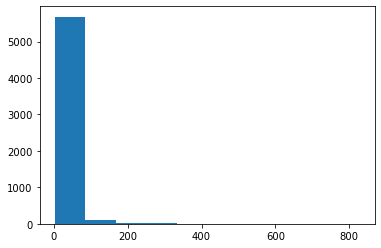

In [132]:
plt.hist(pm10)
plt.show()

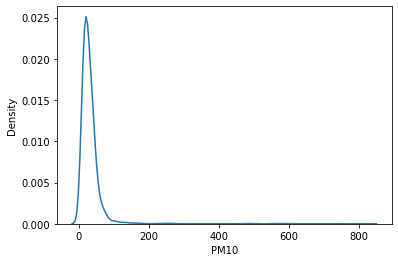

In [133]:
sns.kdeplot(pm10)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


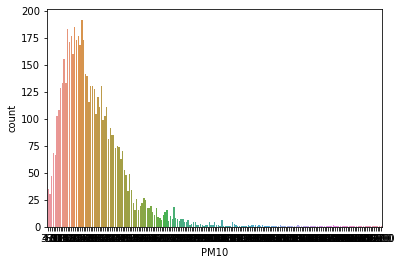

In [134]:
sns.countplot(pm10)
plt.show()

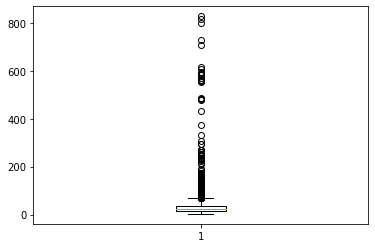

In [135]:
plt.boxplot(pm10)
plt.show()

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 1. 보통 평균인 31.8에 치우쳐져 있다. 하지만 간혹 높은날도 며칠 있다ㅑ.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 1. 이것도 마찬가지로 미세먼지가 높은날 오존이 높고, 그래서 시정거리도 짧은 건지 의심이 든다.
 셋 다 대부분의 데이터가 평균 언저리였는데 몇몇 데이터가 아주 높거나 아주 낮기 때문이다.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.
    - 초미세먼지수치

2. 변수가 수치형인지 범주형인지


In [138]:
#변수의 자료형을 확인해보세요.
pm2 = data['PM2.5']
pm2.unique()

array([ 21.,  13.,  12.,  14.,  10.,   9.,   8.,  16.,  11.,   7.,  18.,
        19.,  24.,  22.,  20.,  17.,  15.,   4.,   6.,   5.,   1.,   2.,
         3.,  26.,  29.,  28.,  27.,  25.,  35.,  39.,  40.,  44.,  55.,
        60.,  62.,  58.,  56.,  54.,  32.,  23.,  31.,  33.,  nan,  30.,
        57.,  34.,  37.,  38.,  36.,  43.,  47.,  41.,  42.,  49.,  59.,
        52.,  50.,  78.,  88.,  89.,  93.,  94.,  87.,  86., 106., 117.,
       116., 115., 102.,  85.,  79.,  77.,  71.,  74.,  73.,  66.,  61.,
        53.,  45.,  65.,  67.,  63.,  51.,  46.,  48.,  91.,  99., 121.,
       125., 120., 123., 109., 110.,  83.,  90., 111., 107., 114., 101.,
       113.,  92.,  70.,  95., 104., 108., 122., 112.,  96.,  81.,  84.,
        82.])

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [139]:
pm2.isna().sum()

95

In [141]:
pm2.fillna(method='ffill', inplace=True)
pm2.isna().sum()

0

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [142]:
pm2.describe()

count    5827.000000
mean       15.574738
std        13.803686
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

In [ ]:
# 5827개 행
# 평균 15.575
# 1.0, 7.0, 13.0, 20.0, 125.0, 15.575

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

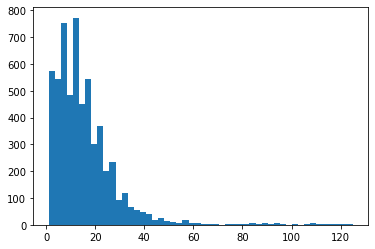

In [146]:
plt.hist(pm2, bins=50)
plt.show()

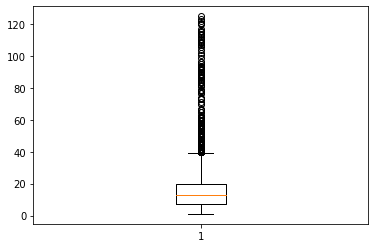

In [145]:
plt.boxplot(pm2)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 1. 미세먼지, 초미세먼지, 오존, 시정이 관련있을 것 같다. 미세먼지가 높은날 초미세먼지도 높고 오존도 높고 시정은 낮을 것 같다.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 1. 그 시간에 따릉이를 대여한 횟수

2. 변수가 수치형인지 범주형인지


In [147]:
#변수의 자료형을 확인해보세요.
count = data['count']
count.unique

<bound method Series.unique of 0        46
1        40
2        31
3        12
4        30
       ... 
5822    273
5823    228
5824    215
5825    125
5826     95
Name: count, Length: 5827, dtype: int64>

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [148]:
count.isna().sum()

0

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [149]:
count.describe()
#평균 215
# 1.0 , 53.0, 186.0, 315.0, 1746.0

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

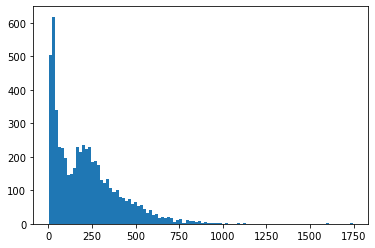

In [151]:
plt.hist(count, bins=100)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


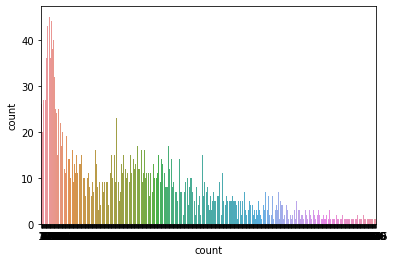

In [152]:
sns.countplot(count)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 1. 한번도 안빌린 시간도 많고, 100번 이전인 시간도 많다.
- 2. 대여 횟수가 250번 이후로는 현저히 떨어진다.
- 3. 엄청 많이 빌린 시간도 있다. 1750

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 1. 따릉이를 많이 빌릴 때(평균 이상)는 날씨가 좋은(비가 안오고 습도가 낮고 미세먼지 없고)날만 빌렸는지?

### 4.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [9]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

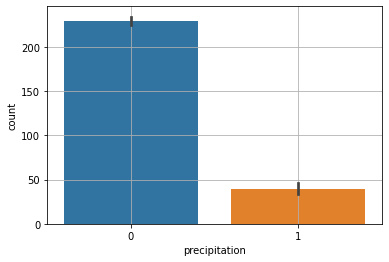

In [154]:
sns.barplot(x=prec, y=count)
plt.grid() #grid있으면 좀 더 보기 용이함.
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


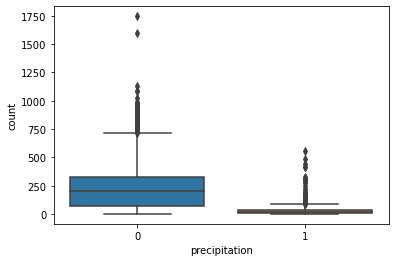

In [155]:
sns.boxplot(prec, count)
plt.show()

In [160]:
spst.ttest_ind(prec, count)

Ttest_indResult(statistic=-88.2666171422794, pvalue=0.0)

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [10]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

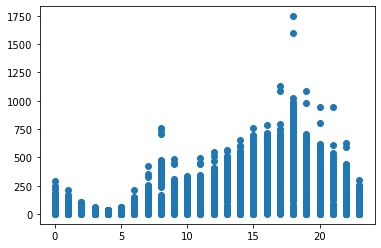

In [161]:
plt.scatter(hour, count)
plt.show()

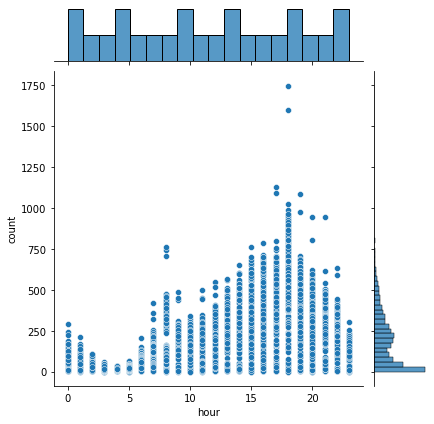

In [162]:
sns.jointplot(x=hour, y=count)
plt.show()

In [163]:
spst.pearsonr(hour, count)

(0.5864350283919393, 0.0)

3. 온도 데이터와 따릉이 대여량간 분석

In [11]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

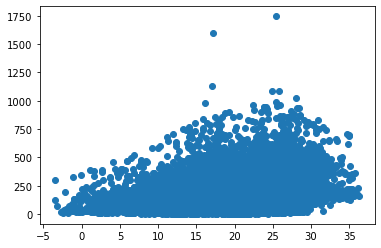

In [164]:
plt.scatter(tmp, count)
plt.show()

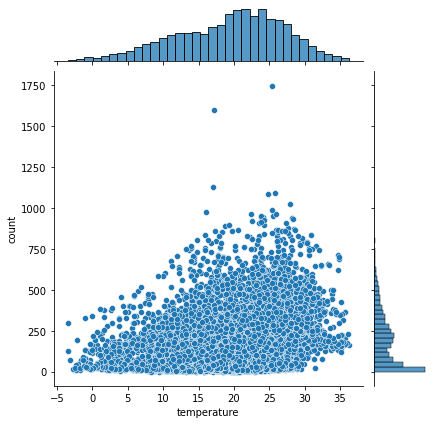

In [165]:
sns.jointplot(x=tmp, y=count)
plt.show()

In [166]:
spst.pearsonr(tmp, count)

(0.2771692363089791, 2.9405165551619465e-103)

4. 풍속 데이터와 따릉이 대여량간 분석

In [12]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

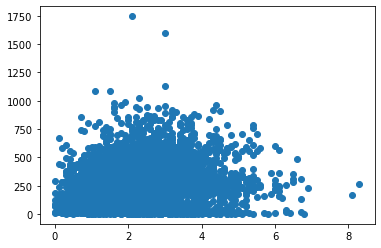

In [167]:
plt.scatter(wind, count)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


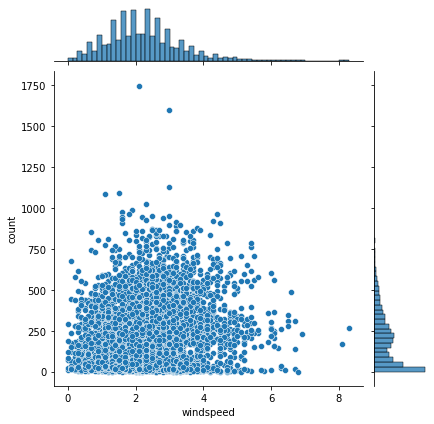

In [168]:
sns.jointplot(wind, count)
plt.show()

In [169]:
spst.pearsonr(wind, count)

(0.22372189900674888, 5.2433176782994606e-67)

5. 습도 데이터와 따릉이 대여량간 분석

In [13]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

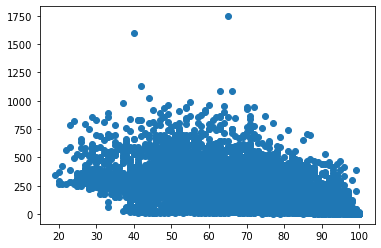

In [170]:
plt.scatter(humidity, count)
plt.show()

In [171]:
spst.pearsonr(humidity, count)

(-0.4789554265904137, 0.0)

6. 시정 데이터와 따릉이 대여량간 분석

In [14]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

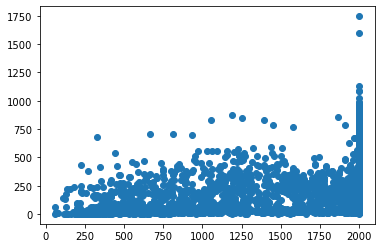

In [172]:
plt.scatter(visibility, count)
plt.show()

In [173]:
spst.pearsonr(visibility, count)

(0.26582778327488765, 7.876003852900128e-95)

7. 오존 데이터와 따릉이 대여량간 분석

In [15]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

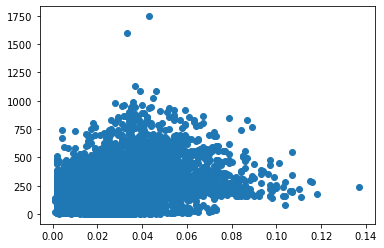

In [174]:
plt.scatter(ozone, count)
plt.show()

In [175]:
spst.pearsonr(ozone, count)

(0.31752578860554814, 1.2344468900121318e-136)

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [16]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

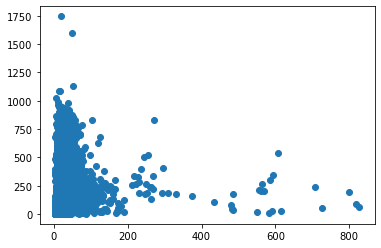

In [176]:
plt.scatter(pm10, count)
plt.show()

In [177]:
spst.pearsonr(pm10, count)

(0.027814670759485925, 0.033738582237285375)

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [17]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

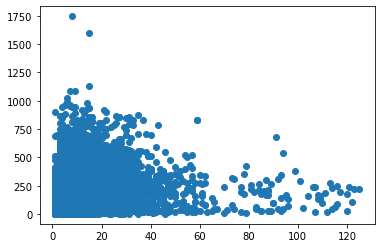

In [178]:
plt.scatter(pm2, count)
plt.show()

In [179]:
spst.pearsonr(pm2, count)

(0.03573659099060327, 0.0063674947679621735)

### 5. 가설 검정

In [429]:
hour_bef_ozone = ozone.shift(1)


In [432]:
hour_bef_ozone.describe()

count    5826.000000
mean        0.031594
std         0.018301
min         0.001000
25%         0.019000
50%         0.030000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

In [434]:
hour_bef_ozone.max()

0.137

In [433]:
hour_bef_ozone.isna().sum()

1

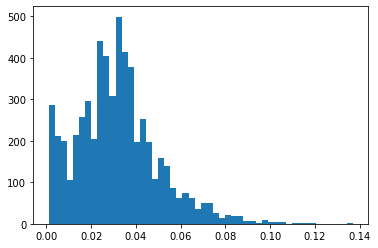

In [431]:
plt.hist(hour_bef_ozone, bins=50)
plt.show()

#### 1: 1시간 전 강우 여부와 따릉이 간에는 연관성이 없다.

In [180]:
data['prec_1hEarly'] = prec.shift(1)

In [183]:
data['prec_1hEarly'].fillna(method='bfill', inplace=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


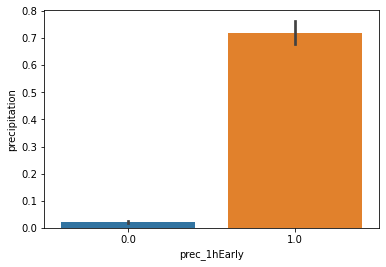

In [384]:
sns.barplot(data['prec_1hEarly'], prec)
plt.show()

In [390]:
spst.ttest_ind(data['prec_1hEarly'], count)

Ttest_indResult(statistic=-88.26661714227939, pvalue=0.0)

#### 2: 하루 기준 시정이 높을수록 따릉이 대여량이 높을 것이다.

In [363]:
data['date'].unique()

array(['2021-04-01T00:00:00.000000000', '2021-04-02T00:00:00.000000000',
       '2021-04-03T00:00:00.000000000', '2021-04-04T00:00:00.000000000',
       '2021-04-05T00:00:00.000000000', '2021-04-06T00:00:00.000000000',
       '2021-04-07T00:00:00.000000000', '2021-04-08T00:00:00.000000000',
       '2021-04-09T00:00:00.000000000', '2021-04-10T00:00:00.000000000',
       '2021-04-11T00:00:00.000000000', '2021-04-12T00:00:00.000000000',
       '2021-04-13T00:00:00.000000000', '2021-04-14T00:00:00.000000000',
       '2021-04-15T00:00:00.000000000', '2021-04-16T00:00:00.000000000',
       '2021-04-17T00:00:00.000000000', '2021-04-18T00:00:00.000000000',
       '2021-04-19T00:00:00.000000000', '2021-04-20T00:00:00.000000000',
       '2021-04-21T00:00:00.000000000', '2021-04-22T00:00:00.000000000',
       '2021-04-23T00:00:00.000000000', '2021-04-24T00:00:00.000000000',
       '2021-04-25T00:00:00.000000000', '2021-04-26T00:00:00.000000000',
       '2021-04-27T00:00:00.000000000', '2021-04-28

In [364]:
oneday_visibility = visibility.rolling(24).mean()
oneday_rental = count.rolling(24).mean()


In [365]:
oneday_visibility.fillna(0, inplace=True)

In [366]:
oneday_visibility.isna().sum()

0

In [367]:
oneday_rental.fillna(0, inplace=True)

In [368]:
oneday_rental.isna().sum()

0

In [369]:
spst.pearsonr(oneday_visibility, oneday_rental)

(0.42131071115393937, 1.6729329474838885e-249)

In [370]:
oneday_ozone = ozone.rolling(24).mean()
oneday_pm10 = pm10.rolling(24).mean()
oneday_pm2 = pm2.rolling(24).mean()

In [371]:
oneday_ozone.fillna(0, inplace=True)
oneday_pm10.fillna(0, inplace=True)
oneday_pm2.fillna(0, inplace=True)

In [372]:
len(oneday_rental)

5827

In [373]:
oneday_date = data['date'].rolling(24)

In [375]:
oneday_date.isna().sum()

AttributeError: 'Rolling' object has no attribute 'isna'

In [345]:
spst.pearsonr(oneday_visibility, oneday_ozone)

(0.10595246923248897, 5.824594631536784e-16)

In [346]:
spst.pearsonr(oneday_visibility, oneday_pm10)

(-0.37752667311158306, 5.202002179949386e-196)

In [347]:
spst.pearsonr(oneday_visibility, oneday_pm2)

(-0.5401664869146847, 0.0)

In [348]:
days = data['date'].unique()

In [349]:
len(days)

244

#### 3. 현재 시간을 기준으로 전후로 3시간동안 비가 온 적이 있다면 따릉이 대여량이 낮을 것이다.

In [206]:
data['3hrsPrec'] = prec.rolling(3, min_periods=1).max()

In [207]:
data

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,prec_1hEarly,3hrsPrec
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,0.0,0.0
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,0.0,0.0
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,0.0,0.0
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,0.0,0.0
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273,0.0,0.0
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228,0.0,0.0
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215,0.0,0.0
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125,0.0,0.0


In [208]:
spst.ttest_ind(data['3hrsPrec'], count)

Ttest_indResult(statistic=-88.25101036221811, pvalue=0.0)

#### 4. 하루 평균 기온이 26도보다 높거나 15도보다 낮을 경우 따릉이 대여량이 낮아질 것이다.

In [243]:
def sol(tmp):
    if (tmp>=26) | (tmp<=15):
        return 1
    else: return 0
    
tmpComp = [sol(temper) for temper in tmp]

In [237]:
tmpComp = pd.Series(tmpComp)

In [397]:
data['count'].isna().sum()

0

In [399]:
data['count'].count()

5827

In [400]:
discomfort = train.loc[train['discomfort']==1, 'count']
comfort = train.loc[train['discomfort']==0, 'count']

spst.ttest_ind(discomfort, comfort)


Ttest_indResult(statistic=16.25169133948118, pvalue=4.06318882142521e-58)

In [405]:
import datetime   
data['day'] = pd.to_datetime(data['date'])
data['day'] = data['day'].dt.day_name()
ddr_go = data[(data['hour']>=17) & (data['hour']<21)]
ddr_go_out = ddr_go[(ddr_go['day']!='Saturday') & (ddr_go['day']!='Sunday')]
ddr_go_data = ddr_go.groupby('day')['count'].sum()


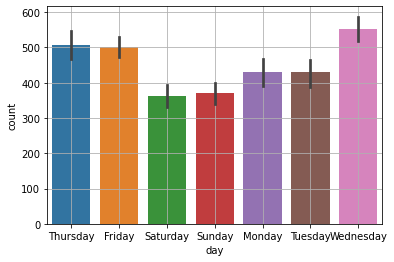

In [406]:
sns.barplot(x=ddr_go['day'], y=ddr_go['count'])
plt.grid() #grid있으면 좀 더 보기 용이함.
plt.show()

In [244]:
spst.ttest_ind(tmpComp, count)

Ttest_indResult(statistic=-88.09880808025714, pvalue=0.0)

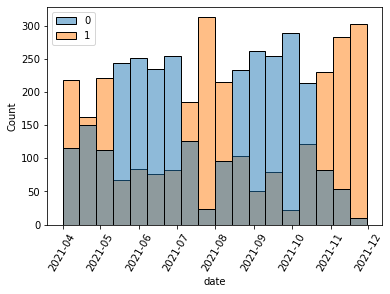

In [315]:
sns.histplot(x=data['date'], hue = tmpComp)
plt.xticks(rotation=60)
plt.show()

#### 5. 사람이 불쾌지수를 느끼는 조건  <p>1.8 * 섭씨온도-0.55(1-습도)(1.8*온도-26)+32</p>   수식이 75이상이라면 따릉이 대여량이 낮아질 것이다.


In [250]:
data.iloc[0]

date             2021-04-01
hour                      1
PM10                   42.0
PM2.5                  21.0
ozone                 0.002
temperature            13.1
precipitation             0
windspeed               1.4
humidity                 49
visibility             2000
count                    46
prec_1hEarly            0.0
3hrsPrec                0.0
Name: 0, dtype: object

In [253]:
data['discomfort'] = 1.8*data['temperature'] - 0.55*(1-data['humidity'])*(1.8*data['temperature']-26) + 32

In [376]:
discom = data['temperature']-0.55*(1-0.01*data['humidity'])*(data['temperature']-14.5)


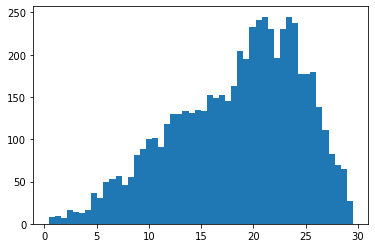

In [380]:
plt.hist(discom, bins=50)
plt.show()

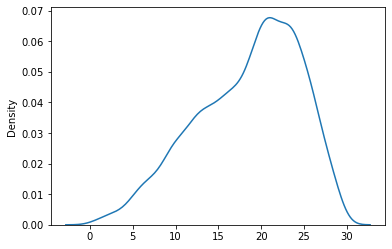

In [381]:
sns.kdeplot(discom)
plt.show()

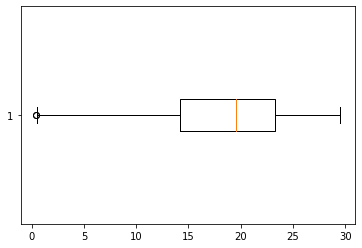

In [383]:
plt.boxplot(discom, vert=False)
plt.show()

In [255]:
def fillD(dis):
    if dis>=75:
        return 1
    else:
        return 0

data['discomfort'] = [fillD(d) for d in data['discomfort']]

In [258]:
spst.ttest_ind(train['discomfort'], train['count'])

Ttest_indResult(statistic=-87.99842514402472, pvalue=0.0)

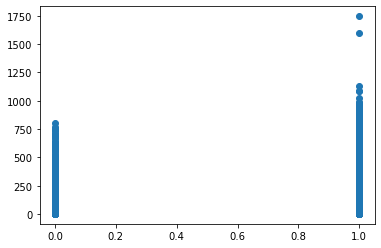

In [385]:
plt.scatter(data['discomfort'], data['count'])
plt.show()

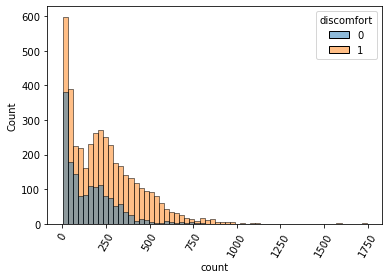

In [388]:
sns.histplot(x='count', data = data, hue = 'discomfort')
plt.xticks(rotation=60)
plt.show()

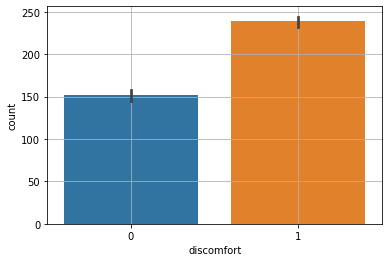

In [389]:
sns.barplot(x="discomfort", y="count", data=data)
plt.grid() #grid있으면 좀 더 보기 용이함.
plt.show()

In [387]:
sns.histplot(x='discomfort', data = data, hue = 'count')
plt.xticks(rotation=60)
plt.show()

KeyboardInterrupt: 

#### 6. 낮동안의(오전 11시 - 오후 7시) 미세먼지 수치가 76이상, 초미세먼지 수치가 38이상일 때 (상당히 나쁨 기준) 따릉이 수요량이 낮아질 것이다.

In [265]:
daypm10 = data.loc[data['hour'].between(11, 21), ['PM10']]
daypm2 = data.loc[data['hour'].between(11, 21), ['PM2.5']]

In [279]:
daypm2

,PM2.5
10,9.0
11,8.0
12,9.0
13,10.0
14,9.0
...,...
5819,37.0
5820,40.0
5821,44.0
5822,58.0


In [280]:
def makeDust(pm10, pm2):
    if (float(pm10)>=76) | (float(pm2)>=38):
        return 1
    else:
        return 0
dust = [makeDust(p10, p2) for p10, p2 in zip(daypm10['PM10'], daypm2['PM2.5'])]

In [295]:
cntForDust = data.loc[data['hour'].between(11, 21), ['count']]

In [301]:
spst.ttest_ind(dust, cntForDust['count'])

Ttest_indResult(statistic=-92.18565307111898, pvalue=0.0)

In [303]:
import statsmodels.api as sm
model = sm.Logit(dust, cntForDust)
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.275201
         Iterations 7
count    6.833855e-181
dtype: float64


#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

- 하루 치 시정값의 평균, 대여량
- window size=3 만큼의 비가 온 여부, 대여량
- 하루 평균 기온이 26도보다 높거나 15도 보다 낮은지 여부, 대여량
- 불쾌지수 조건 충족 여부, 대여량
- 낮시간 미세먼지 및 초미세먼지 '상당히 나쁨 기준' 충족 여부, 대여량

#### <font color='green'>2. 약한 관계의 변수</font>


#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


- 1번가설

### 6. Insight 도출

- 1. 불쾌지수가 높은 달인 7, 8, 9월에는 따릉이 규모를 축소하고 다른 달에 확대한다.
- 2. 기온이 26도 이상이거나 15도 이하인 시간이 많은 8월과 12월에 따릉이 규모를 축소하고 다른달에 확대한다.
- 3. 